In [44]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
x_data_generated, y_data_generated = make_classification(scale=1)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(),x_data_generated,y_data_generated,scoring="accuracy").mean()

np.float64(0.8)

In [45]:
df = pd.DataFrame(x_data_generated)
df["target"]=y_data_generated
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.937856,-0.184443,2.185181,1.237777,-0.038806,1.753694,1.004591,0.047832,0.203079,0.751747,...,-1.533946,0.129332,-0.389816,1.110322,0.165815,-0.066859,-0.266473,-0.556462,-1.451058,0
1,2.064298,0.089378,0.765010,2.657679,1.089682,0.200090,0.478513,2.073682,0.378365,-0.953521,...,-0.196628,0.593282,-0.761431,-0.896555,-0.356205,0.088509,1.036148,0.332148,-1.861711,1
2,-0.224151,-0.194729,1.674360,-0.192164,0.371666,0.280801,-0.076143,1.570426,-0.471138,0.921733,...,0.163387,0.853306,0.498993,0.582848,-0.314075,-0.349930,-0.823876,0.007884,0.628825,1
3,0.670298,1.142815,-0.071507,0.258823,-1.740736,1.520323,-0.337344,-0.573009,0.170159,0.755629,...,-1.754280,1.012598,-2.679851,0.951799,0.418431,2.161158,3.235386,-0.919372,-1.400459,1
4,1.757276,0.078516,-0.980983,2.029604,0.693174,1.632154,1.040006,0.137803,1.172562,-1.312711,...,0.346507,-0.981537,0.139575,-2.112787,-1.350860,0.897039,-1.194498,1.362103,1.035877,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.314035,0.076667,0.189211,-0.420690,-1.382376,-0.706629,-0.360276,0.497130,1.043692,-0.240804,...,1.440949,0.765992,-0.251861,1.275938,-0.720043,0.044370,1.523352,0.358985,-0.177744,1
96,-1.278184,-0.477522,-2.544727,-1.130958,1.876403,1.179730,0.660808,0.636155,0.390374,0.428181,...,0.922676,1.089670,0.859562,2.129965,1.017639,-1.871277,0.570173,-0.723368,-0.650320,0
97,2.402271,1.440633,-0.662505,2.880783,-1.710481,-1.609094,0.449021,0.642734,-0.532411,1.448651,...,-1.142700,1.257065,1.389304,0.881279,-0.418897,0.851345,-1.092109,2.885906,-0.100354,1
98,0.200100,-2.001557,0.101052,0.737130,-0.673970,0.384968,0.596125,-1.804050,2.271643,-0.170066,...,-1.213233,0.831833,-0.580661,-0.158642,0.018564,-1.683906,-0.310356,1.186211,1.208896,0


In [46]:
corr = df.corr()

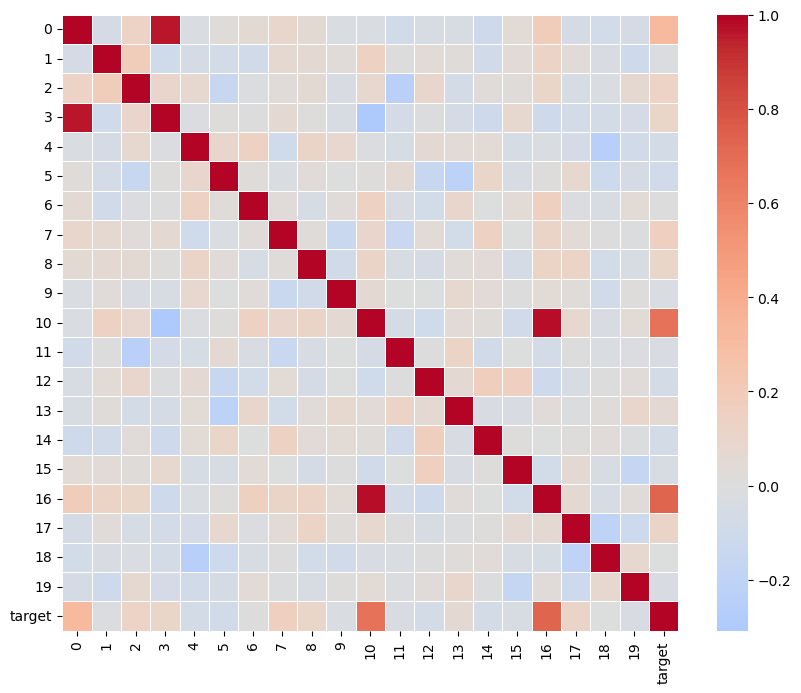

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap = "coolwarm", center=0, square = True, linewidths=0.5)
plt.show()

Удалим признаки под номерами 1,4,5,6,9,11,15,18,19, т.к. они почти не имеют корреляции с целевой пременной.

In [48]:
df = df.drop(columns=[1,4,5,6,9,11,15,18,19])
cross_val_score(LogisticRegression(),df.drop(columns=["target"]),df["target"],scoring="accuracy").mean()

np.float64(0.85)

In [55]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.00001)
data = selector.fit_transform(df.drop(columns=["target"]))

mask = selector.get_support()
selected_features = df.drop(columns=["target"]).columns[mask]
cross_val_score(LogisticRegression(),df.drop(columns=["target"]),df["target"],scoring="accuracy").mean()

np.float64(0.85)

все прежние признаки остались после этого способа.

In [67]:
from sklearn.feature_selection import SelectKBest,f_classif
x_data_generated, y_data_generated = make_classification(scale=1)
df = pd.DataFrame(x_data_generated)
df["target"]=y_data_generated
X = df.drop(columns="target")
y = df["target"]

selector = SelectKBest(score_func=f_classif,k=5)
X_selected = selector.fit_transform(X,y)
mask=selector.get_support()
selected_features = X.columns[mask]
selected_features

Index([0, 5, 7, 8, 16], dtype='object')

In [65]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,1.088879,0.311090,-0.452483,-0.478840,-1.486994,-0.240832,-0.258447,1.361522,0.519839,-0.276997,...,-0.059579,-1.389419,-0.102782,1.364336,0.058052,0.026456,-0.246056,1.577350,-0.228330,1
1,-2.073029,0.813087,0.186260,-1.498961,0.935819,-0.918460,-0.779848,0.081298,-0.917812,0.177741,...,-1.214844,-2.139076,0.859445,0.053359,0.568040,0.675805,0.245160,-2.465894,-0.190595,1
2,0.624081,1.564447,-0.564107,0.826772,-0.203578,0.134824,0.779313,-1.063857,0.248364,0.390378,...,-0.647602,0.054093,-0.492196,-0.957832,-2.637170,-0.248332,0.013006,0.981458,-0.219353,0
3,-0.263730,-0.672589,0.644882,2.158868,0.579437,0.214715,-0.321946,-0.199454,-0.122404,0.381024,...,-0.878313,-0.558707,1.088126,-0.018854,-1.097196,0.070953,0.048712,1.339674,1.109444,0
4,0.232355,-0.046978,-0.410634,0.779124,2.717499,-2.208558,0.227512,-1.031860,0.075378,0.099596,...,2.111424,-0.631750,-1.641610,0.370119,-0.880403,0.166818,0.057943,-0.623544,-0.506460,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-2.028636,-1.536707,1.669060,0.252528,0.222655,0.301734,1.280036,-2.111332,-0.957054,-0.468167,...,-0.235329,-1.274433,0.236753,0.497372,1.566672,-0.588318,0.422897,0.437225,0.902645,0
96,1.890157,-0.848185,0.773411,1.183629,1.858665,-1.034763,-1.008197,-0.857501,0.815788,-0.765483,...,-0.018203,-0.910841,1.075752,-0.926620,0.685904,-0.015710,-0.158105,1.217740,-0.292461,0
97,0.861834,-1.649113,0.638169,-0.514241,-2.235848,0.778715,-0.382511,0.718135,0.401782,0.673060,...,-1.054692,-1.683799,-0.741076,-0.845827,-2.401059,0.108343,-0.164725,0.671681,-1.161141,1
98,-0.137002,-1.990956,-2.742805,0.119853,-1.160713,0.942314,1.198756,-1.081703,-0.089880,0.375272,...,1.034903,0.373708,0.114016,-0.043707,-0.389788,-0.253136,0.106997,0.201548,0.626542,0


In [68]:
df1 = df.drop(columns=[1,2,3,4,6,9,10,11,12,13,14,15,17,18,19])
cross_val_score(LogisticRegression(),df1.drop(columns=["target"]),df1["target"],scoring="accuracy").mean()

np.float64(0.9199999999999999)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe_l1 = Pipeline([("scaler", StandardScaler()),
                    ("select",SelectFromModel(LogisticRegression(penalty="l1",solver="liblinear",C=1.0,random_state=42))),
                    ("model",LogisticRegression(solver="liblinear",random_state=42))])
x_data_generated, y_data_generated = make_classification(scale=1)
df = pd.DataFrame(x_data_generated)
df["target"]=y_data_generated
X = df.drop(columns="target")
y = df["target"]
cross_val_score(pipe_l1,X,y,cv=5,scoring="accuracy").mean()

np.float64(0.9)

In [77]:
from sklearn.feature_selection import SequentialFeatureSelector

pipe_l1 = Pipeline([("scaler", StandardScaler()),
                    ("select",SequentialFeatureSelector(LogisticRegression(solver="liblinear",random_state=42),n_features_to_select=5,direction="forward",scoring="accuracy",cv=5,n_jobs=-1)),
                    ("model",LogisticRegression(solver="liblinear",random_state=42))])
x_data_generated, y_data_generated = make_classification(scale=1)
df = pd.DataFrame(x_data_generated)
df["target"]=y_data_generated
X = df.drop(columns="target")
y = df["target"]
cross_val_score(pipe_l1,X,y,cv=5,scoring="accuracy").mean()

np.float64(0.82)

In [79]:
itog = pd.DataFrame({"Способ выбора признаков":["-","Матрица признаков+VarianceThreshold","SelectKBest","SelectFromModel+RF","SFS"],"Точность":[0.8,0.85,0.92,0.9,0.82]})
itog

,Способ выбора признаков,Точность
0,-,0.80
1,Матрица признаков+VarianceThreshold,0.85
2,SelectKBest,0.92
3,SelectFromModel+RF,0.90
4,SFS,0.82
